Scoring Models
======

From the last notebook we learned how to select the best model given a set model architecture, but often you may have multiple versions of the archtiecture in mind that you would like to test. A common method is to use probabilistic statistical measures that attempt to quantify both the model performance on the training dataset and the complexity of the model. The scores often used are [Akaike](https://builtin.com/data-science/what-is-aic) and [Bayseian](https://medium.com/@analyttica/what-is-bayesian-information-criterion-bic-b3396a894be6) Information Criterion (AIC & BIC respectively). Both evaluate the model's fit on the training data, adding penalties to for more complex models as these tend to overfit to the dataset. This means the scores will reflect the model that best generalises to the dataset.

With criterion values the lower the score the better and is relative, which means it can only be compared with other models trained on the same dataset and in the same way. Both AIC and BIC evaluate in very similar ways with minor differences in their formula, so the results should often be very similar.

It is important to understand the limitations of probabilistic scores for models when viewing the results, both AIC and BIC will by design prioritise the simplest model that best fits the dataset, it will have no knowledge of the uncertainty of the model or any biological relavence. It is therefore up to you to decide, given your prior knowledge of the system, which of the best performing models to pick.

For this example we will load in the whole dataset and train a fully open HMM (as in everything can transition into each other and all states can emit all observables) for the sake of ease

In [15]:
# We'll load in the pacakges we need
import pandas as pd
import numpy as np
import pickle 
from hmmlearn.hmm import CategoricalHMM

# Load in your cleaned dataset
# df = pd.read_pickle('/USERS_PATH/ReCoDE-HMMs-for-the-discovery-of-behavioural-states/admin/cleaned_data.pkl')
df = pd.read_pickle('/home/lab/Desktop/ReCoDE-HMMs-for-the-discovery-of-behavioural-states/admin/cleaned_data.pkl')

# List the observables
observables = ['immobile', 'micro', 'walking']


In [5]:
# Transform all the data to the right shape

ar_data = df.groupby('id')['hmm'].apply(np.array)
ar_data = np.array(ar_data)

len_seq_all = [len(ar) for ar in ar_data]

seq_all = np.concatenate(ar_data, axis = 0) 
seq_all = seq_all.reshape(-1, 1)


All hmmlearn hidden markov models have a built in method that will give you AIC, BIC scores, as well as the .score() method we've used previously that gives the log liklihood. We'll run through briefly how to get these scores before creating models with varying numbers of hidden states.

In [16]:
# Lets load in the 2 state and 4 state model you trained previously into list called models
models = []
models.append(pickle.load(open('/home/lab/Desktop/ReCoDE-HMMs-for-the-discovery-of-behavioural-states/admin/2_state_model.pkl', "rb")))
models.append(pickle.load(open('/home/lab/Desktop/ReCoDE-HMMs-for-the-discovery-of-behavioural-states/admin/4_state_model.pkl', "rb")))

# We'll create some empty lists to append the scores
aic = []
bic = []
lls = []

for hmm in models:
    aic.append(hmm.aic(seq_all, len_seq_all)) # get the AIC score with .aic()
    bic.append(hmm.bic(seq_all, len_seq_all)) #  get the BIC score with .bic()
    lls.append(hmm.score(seq_all, len_seq_all))# get the logliklihood will .score()

We can now use matplotlib to plot the data. If you've used python before you've probably seen or used [Matplotlib](https://matplotlib.org/) before, if not its a library to visualising data in python. Click the embedded link for more information

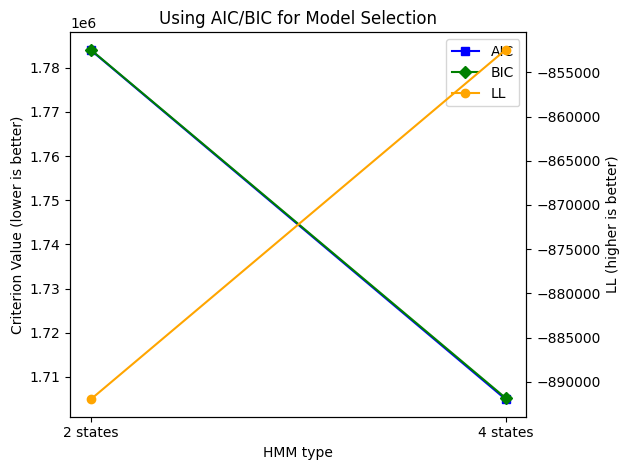

In [25]:
# This is the way to load matplotlib 
import matplotlib.pyplot as plt

# Labels for the x-axis
model_names = ['2 states', '4 states']

# Create the plot
fig, ax = plt.subplots()

# Plot AIC and BIC on the first y-axis
ln1 = ax.plot(model_names, aic, label="AIC", color="blue", marker="s")
ln2 = ax.plot(model_names, bic, label="BIC", color="green", marker="D")
# Create a second y-axis for logliklihood as its scores differently
ax2 = ax.twinx()
ln3 = ax2.plot(model_names, lls, label="LL", color="orange", marker="o")

# Joins the legends and sets the labels
ax.legend(handles=ax.lines + ax2.lines)
ax.set_title("Using AIC/BIC for Model Selection")
ax.set_ylabel("Criterion Value (lower is better)")
ax2.set_ylabel("LL (higher is better)")
ax.set_xlabel("HMM type")
fig.tight_layout()

# Pring the plot to screen
plt.show()

The lower the AIC and BIC the better, and the highers the logliklihood the better. From this we can see that despite the additional complexity of the 4 state model, it performs better on the dataset in all scores.

Task 
====

Create a loop below that evaluates a models with varying amounts of hidden states

In [39]:
best_ll = -800
score = -900
if best_ll is None or best_ll < score:
    print(True)

In [41]:
# Finsih the loop below using what you created in the previous notebook
# hint for storing the best model

aic = []
bic = []
lls = []

# Create models of size 2, 4, 6, 8
n_states = [2, 4, 6, 8]

for n in n_states:

In [ ]:
# Write the code to plot the scores here

In [13]:
# completed

aic = []
bic = []
lls = []
ns = [2, 4, 6, 8]
for n in ns:
    print(f'Beginning training {n} states')
    best_ll = None
    best_model = None

    for i in range(10):

        h = CategoricalHMM(n_components = n,  n_iter = 20, tol = 5, n_features = len(observables), params = 'ste', init_params = 'ste') 
        h.fit(seq_all, len_seq_all)
        score = h.score(seq_all, len_seq_all)
        if not best_ll or score > best_ll:
            best_ll = score
            best_model = h

    aic.append(best_model.aic(seq_all, len_seq_all))
    bic.append(best_model.bic(seq_all, len_seq_all))
    lls.append(best_model.score(seq_all, len_seq_all))


Beginning training 2 states
-1203926.9383076795
Beginning training 4 states
-839036.9550102057
Beginning training 6 states
-838625.6714428297
Beginning training 8 states
-839437.7857630898


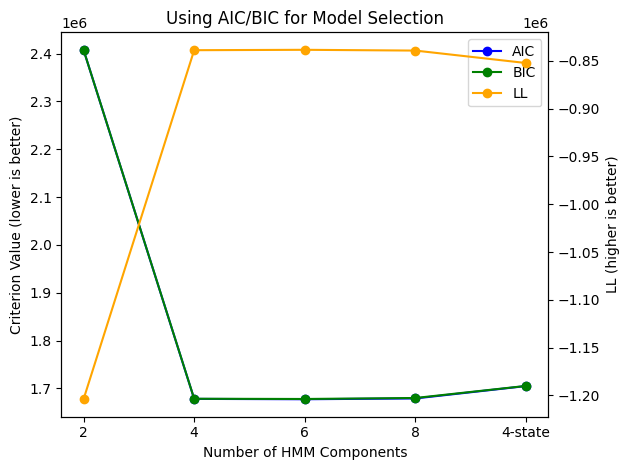

In [14]:
# completed example

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ln1 = ax.plot(ns, aic, label="AIC", color="blue", marker="o")
ln2 = ax.plot(ns, bic, label="BIC", color="green", marker="o")
ax2 = ax.twinx()
ln3 = ax2.plot(ns, lls, label="LL", color="orange", marker="o")

ax.legend(handles=ax.lines + ax2.lines)
ax.set_title("Using AIC/BIC for Model Selection")
ax.set_ylabel("Criterion Value (lower is better)")
ax2.set_ylabel("LL (higher is better)")
ax.set_xlabel("Number of HMM Components")
fig.tight_layout()

plt.show()

Extra task 
=====
Try training models with varying numbers of hidden states that are true to the biology (i.e. the sleep states only emit as immobile and sleep stages are sequential).

Compare the score for each model